# 4. Data Mining
We will address finally running the Regression algorithms. In particular we will use:
a. Regression Trees
b. Lasso Regression
c. Linear Regression.


## Packages to use
Make sure, that we use the packages that were referenced in the slides and in the exercises.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils_io import load_step, save_step
# from sklearn.tree import DecisionTreeRegressor, export_text
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

X_train = load_step("step3_X_train")
X_test = load_step("step3_X_test")
y_train = load_step("step3_y_train")
y_test = load_step("step3_y_test")

X_train_scaled = load_step("step3_X_train_scaled")
X_test_scaled = load_step("step3_X_test_scaled")

## a. Regression Trees
The idea when using Regression Trees is to create two models, one using the unscaled data (since this methods does not require scaling), and one using the scaled data. The intuition is that the performance should be the same on both models. After running both models we can see that our hypothesis was correct and there is in fact no difference between the unscaled and the scaled models when it comes to performance.

#### a.1 Unscaled Data

In [97]:
# Random Forest Regressor 
rf = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=40,           
    min_samples_split=6,     # min samples to split
    min_samples_leaf=2,      # min samples per leaf
    max_features='sqrt',     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf.fit(X_train, y_train)

# pred
y_pred = rf.predict(X_test)

# performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Random Forest MSE: {mse:.2f}")
print(f"Random Forest R²: {r2:.3f}")

# feature importance
importances = pd.Series(rf.feature_importances_, index=X_train.columns)
importances = importances.sort_values(ascending=False)
print("\nTop 10 wichtige Features:")
print(importances.head(10))

/Users/maxim/Documents/Code/Data_Mining/datamining_group12/venv/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest MSE: 269.44
Random Forest R²: 0.360

Top 10 wichtige Features:
acousticness        0.082558
duration_ms         0.079466
danceability        0.076006
loudness            0.075277
energy              0.073880
valence             0.071427
speechiness         0.070847
instrumentalness    0.065586
tempo               0.064577
liveness            0.061380
dtype: float64


#### a.2 Scaled Data

In [ ]:

rf_scaled = RandomForestRegressor(
    n_estimators=200,        # number of trees
    max_depth=40,            
    min_samples_split=6,     # min samples to split
    min_samples_leaf=2,      # min samples per leaf
    max_features='sqrt',     # features per split
    random_state=42,
    n_jobs=-1
)

# train
rf_scaled.fit(X_train_scaled, y_train)

# pred
y_pred_scaled = rf_scaled.predict(X_test_scaled)

# performance
mse_scaled = mean_squared_error(y_test, y_pred_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print(f"Random Forest (scaled) MSE: {mse_scaled:.2f}")
print(f"Random Forest (scaled) R²: {r2_scaled:.3f}")

# feature importance
importances_scaled = pd.Series(rf_scaled.feature_importances_, index=X_train_scaled.columns)
importances_scaled = importances_scaled.sort_values(ascending=False)
print("\nTop 10 wichtige Features (scaled):")
print(importances_scaled.head(10))

/Users/maxim/Documents/Code/Data_Mining/datamining_group12/venv/lib/python3.13/site-packages/sklearn/base.py:1365: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest (scaled) MSE: 269.44
Random Forest (scaled) R²: 0.360

Top 10 wichtige Features (scaled):
acousticness        0.082558
duration_ms         0.079466
danceability        0.076006
loudness            0.075277
energy              0.073880
valence             0.071427
speechiness         0.070847
instrumentalness    0.065586
tempo               0.064577
liveness            0.061380
dtype: float64


#### a.3 Visualization

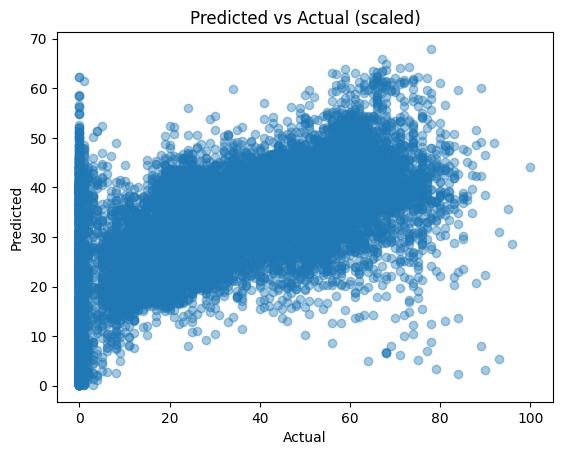

In [90]:
y_pred_scaled = rf_scaled.predict(X_test_scaled)

plt.scatter(y_test, y_pred_scaled, alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Predicted vs Actual (scaled)")
plt.show()